# Assembly and Stock model test

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
import math

# Stock model

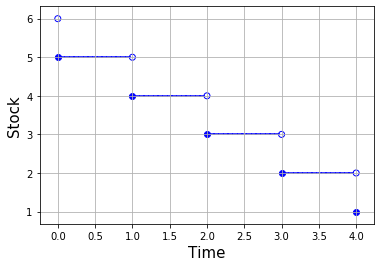

In [49]:
import numpy as np
import matplotlib.pyplot as plt

b = 5
xx_1 = np.linspace(0, 4, 65)
xx_2 = np.arange(0, 5)
yy_1 = -np.floor(xx_1) + b
yy_2 = -np.floor(xx_2) + b
yy_3 = -xx_2 + 1 + b

fig, ax = plt.subplots()
ax.grid()
#ax.set_title("Floor function", fontsize=16)
ax.set_xlabel("Time", fontsize=15)
ax.set_ylabel("Stock", fontsize=15)
#ax.set_xlim(0, 4)
#ax.set_ylim(-1, 5)

ax.scatter(xx_1, yy_1, marker="_", c="blue")
ax.scatter(xx_2, yy_2, c="blue")
ax.scatter(xx_2, yy_3, facecolor='None', edgecolors='blue')

plt.show()

# Assembly model test

In [50]:
class Assembly():
    # Assembly agent class, gaussian type
    
    def __init__(self, mu=10, sigma=1, jobp=True):
        self.stock = 0.0
        self.jobp = jobp
        self.mu = mu
        self.sigma = sigma
        self.time = 0
        self.working_time = 0
        self.product = 0.0
        self.product_all = 0.0
 
    # assembly agent model
    def work(self):
        self.time +=1
        self.product = 0.0
        if self.jobp:
            if self.stock > 0:
                print('start')
                self.stock -= 1.0
                self.working_time = self.time + np.random.normal(self.mu, self.sigma)
                self.jobp = False
        else:
            if self.time > self.working_time:
                self.product = 1.0
                self.product_all += 1.0
                self.jobp = True
                print('done', self.time)
                
                # init time
                self.time = 0
        return self.product
   
    # stock model add
    def stock_add(self, stock=0):
        self.stock += stock
        return self.stock
    # stock model get
    def stock_get(self, stock=0):
        if self.stock > 0:
            self.stock -= stock
        return self.stock
    
    # get product
    def product_stock(self, product=0):
        if self.product_all > 0:
            self.product_all -= product
        return self.product_all
    
    def reset(self):
        self.time = 0
        self.product = 0.0
        self.stock = 0.0
        self.product_all = 0.0
        #return self.time, self.product, self.stock

In [51]:
as1 = Assembly(mu=10, sigma=0)

In [52]:
as1.reset()
as1.stock_add(8)
reward = 0.0
for _ in range(20):
    reward += as1.work()
    #as1.stock_get(1)
    print(as1.stock_add(), reward, as1.product_stock())

start
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
7.0 0.0 0.0
done 12
7.0 1.0 1.0
start
6.0 1.0 1.0
6.0 1.0 1.0
6.0 1.0 1.0
6.0 1.0 1.0
6.0 1.0 1.0
6.0 1.0 1.0
6.0 1.0 1.0
6.0 1.0 1.0


# Conection Test

In [53]:
from enum import Enum
import numpy as np


class State():

    def __init__(self, row=-1, column=-1, agv_stock=0):
        self.row = row
        self.column = column
        self.agv_stock = agv_stock
    def __repr__(self):
        return "<State: [{}, {}, {}]>".format(self.row, self.column, self.agv_stock)

    def clone(self):
        return State(self.row, self.column, self.agv_stock)

    def __hash__(self):
        return hash((self.row, self.column, self.agv_stock, self.agv_stock))

    def __eq__(self, other):
        return self.row == other.row and self.column == other.column


class Action(Enum):
    UP = 1
    DOWN = -1
    LEFT = 2
    RIGHT = -2
    #STOP = 3 #add new action
    #STOPP = -3

class Assembly():
    # Assembly agent class, gaussian type
    
    def __init__(self, mu=10, sigma=1, jobp=True):
        self.stock = 0.0
        self.jobp = jobp
        self.mu = mu
        self.sigma = sigma
        self.time = 0
        self.working_time = 0
        self.product = 0.0
        self.product_all = 0.0
 
    # assembly agent model
    def work(self):
        self.time +=1
        self.product = 0.0
        if self.jobp:
            if self.stock > 0:
                # print('start')
                self.stock -= 1.0
                self.working_time = self.time + np.random.normal(self.mu, self.sigma)
                self.jobp = False
        else:
            if self.time > self.working_time:
                self.product = 1.0
                self.product_all += 1.0
                self.jobp = True
                #print('done', self.time)
                
                # init time
                self.time = 0
        return self.product
   
    # stock model add
    def stock_add(self, stock=0):
        self.stock += stock
        return self.stock
    # stock model get
    def stock_get(self, stock=0):
        if self.stock > 0:
            self.stock -= stock
        return self.stock
    
    # product model add
    def product_stock_add(self, product=0):
        self.product_all += product
        return self.product_all
    
    # product model get
    def product_stock_get(self, product=0):
        if self.product_all > 0:
            self.product_all -= product
        return self.product_all
    
    def reset(self):
        self.time = 0
        self.product = 0.0
        self.stock = 0.0
        self.product_all = 0.0
        #return self.time, self.product, self.stock

class Environment():

    def __init__(self, grid, move_prob=1, init_row=0, init_colmn=0):
        # grid is 2d-array. Its values are treated as an attribute.
        # Kinds of attribute is following.
        #  0: ordinary cell
        #  -1: damage cell (game end)
        #  1: reward cell (game end)
        #  9: block cell (can't locate agent)
        self.grid = grid
        self.agent_state = State()

        # Default reward is minus. Just like a poison swamp.
        # It means the agent has to reach the goal fast!
        self.default_reward = -0.04

        # Agent can move to a selected direction in move_prob.
        # It means the agent will move different direction
        # in (1 - move_prob).
        self.move_prob = move_prob
        
        # start point
        self.init_row = init_row
        self.init_colmn = init_colmn
        
        # Assumbly agant model output
        self.assembly = Assembly()
        
        # Assembly agent mode input 
        self.assembly_in = Assembly()
        
        # agv agent stock
        self.agv_stock = 0
        
        # total time
        self.total_time = 0
        
        self.reset()

    @property
    def row_length(self):
        return len(self.grid)

    @property
    def column_length(self):
        return len(self.grid[0])

    @property
    def actions(self):
        return [Action.UP, Action.DOWN,
                Action.LEFT, Action.RIGHT]#, Action.STOP, Action.STOPP] # add STOP action
    
    @property
    def actions_length(self):
        return len(Action)
    
    @property
    def states(self):
        states = []
        for _ in range(2): # add stock loop
            for row in range(self.row_length):
                for column in range(self.column_length):
                    # Block cells are not included to the state
                    if self.grid[row][column] != 9:
                        states.append(State(row, column, _))
        return states

    def transit_func(self, state, action):
        transition_probs = {}
        if not self.can_action_at(state):
            # Already on the terminal cell.
            return transition_probs

        opposite_direction = Action(action.value * -1)

        for a in self.actions:
            prob = 0
            if a == action:
                prob = self.move_prob
            elif a != opposite_direction:
                prob = (1 - self.move_prob) / 2

            next_state = self._move(state, a)
            if next_state not in transition_probs:
                transition_probs[next_state] = prob
            else:
                transition_probs[next_state] += prob

        return transition_probs

    def can_action_at(self, state):
        if self.grid[state.row][state.column] == 0:
            return True
        elif self.grid[state.row][state.column] == 2:
            return True
        elif self.grid[state.row][state.column] == 1:
            return True
        else:
            return False

    def _move(self, state, action):
        if not self.can_action_at(state):
            raise Exception("Can't move from here!")

        next_state = state.clone()

        # Execute an action (move).
        if action == Action.UP:
            next_state.row -= 1
        elif action == Action.DOWN:
            next_state.row += 1
        elif action == Action.LEFT:
            next_state.column -= 1
        elif action == Action.RIGHT:
            next_state.column += 1

        # Check whether a state is out of the grid.
        if not (0 <= next_state.row < self.row_length):
            next_state = state
        if not (0 <= next_state.column < self.column_length):
            next_state = state

        # Check whether the agent bumped a block cell.
        if self.grid[next_state.row][next_state.column] == 9:
            next_state = state
        
        # add stock state
        attribute = self.grid[state.row][state.column]
        if attribute == 1:
            if self.agv_stock > 0:
                self.assembly.stock_add(1)
                self.agv_stock -= 1
        elif attribute == 2:
            if 0 <= self.agv_stock < 1:
                if self.assembly_in.product_stock_get() > 0:
                    # Get stock
                    self.assembly_in.product_stock_get(1)
                    self.agv_stock += 1
        
        next_state.agv_stock = self.agv_stock
        
        return next_state

    # Under update for Facutory Automation
    def reward_func(self, state):
        #reward = self.default_reward
        
        # run asseymbly workers
        self.assembly_in.work()
        p_out = self.assembly.work() 
        
        # reward function in Factory
        reward = self.column_length*p_out - self.assembly.stock_add() - self.assembly_in.product_stock_get()
        
        done = False

        # Check an attribute of next state. => to _move
        attribute = self.grid[state.row][state.column]
        if attribute == 1:
            done = False
        elif attribute == -1:
            # Get damage! and the game ends.
            reward += -1
            done = True
        elif attribute == 2:
            done = False
        
        # Time counting
        self.total_time += 1
        if self.total_time > 10*self.column_length:
            done = True
            
        return reward, done

    def reset(self):

        # Assembly agnet reset, output
        self.assembly = Assembly(mu=self.column_length*2, sigma=0)
        self.assembly.stock_add(0)
        
        # Assembly agent reset, input
        self.assembly_in = Assembly(mu=self.column_length*2, sigma=0)
        self.assembly_in.stock_add(10)
        #self.assembly_in.product_stock_add(1)
        
        # agv stock
        self.agv_stock = 1
        
        # time count
        self.total_time = 0
        
        # Locate the agent at lower left corner.
        self.agent_state = State(self.init_row, self.init_colmn, self.agv_stock) ## update
        
        return self.agent_state

    def step(self, action):
        next_state, reward, done = self.transit(self.agent_state, action)
        if next_state is not None:
            self.agent_state = next_state

        return next_state, reward, done

    def transit(self, state, action):
        transition_probs = self.transit_func(state, action)
        if len(transition_probs) == 0:
            return None, None, True

        next_states = []
        probs = []
        for s in transition_probs:
            next_states.append(s)
            probs.append(transition_probs[s])

        next_state = np.random.choice(next_states, p=probs)
        reward, done = self.reward_func(next_state)
        return next_state, reward, done

# AGV + Assembly Agent 

In [54]:
import random

class Agent():

    def __init__(self, env):
        self.actions = env.actions

    def policy(self, state):
        return random.choice(self.actions)
    
    def rspolicy(self, state):
        return random.choice([self.actions[3], self.actions[4]])
    
    def round_policy(self, state):
        if state == 0: 
            return self.actions[2]
        else:
            return self.actions[3]

In [55]:
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

env = Environment(grid, init_row=1,init_colmn=0)
agent = Agent(env)
# Try 10 game.
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        #action = agent.policy(state)
        action = agent.round_policy(state.agv_stock)
        next_state, reward, done = env.step(action)
        
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, action, reward)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets 32.0 reward.
Episode 1: Agent gets 32.0 reward.
Episode 2: Agent gets 32.0 reward.
Episode 3: Agent gets 32.0 reward.
Episode 4: Agent gets 32.0 reward.
Episode 5: Agent gets 32.0 reward.
Episode 6: Agent gets 32.0 reward.
Episode 7: Agent gets 32.0 reward.
Episode 8: Agent gets 32.0 reward.
Episode 9: Agent gets 32.0 reward.


# Observation 

In [56]:
class ELAgent():

    def __init__(self, epsilon):
        self.Q = {}
        self.epsilon = epsilon
        self.reward_log = []

    def policy(self, s, actions):
        if np.random.random() < self.epsilon:
            return np.random.randint(len(actions))
        else:
            if s in self.Q and sum(self.Q[s]) != 0:
                return np.argmax(self.Q[s])
            else:
                return np.random.randint(len(actions))

    def init_log(self):
        self.reward_log = []

    def log(self, reward):
        self.reward_log.append(reward)

    def show_reward_log(self, interval=50, episode=-1):
        if episode > 0:
            rewards = self.reward_log[-interval:]
            mean = np.round(np.mean(rewards), 3)
            std = np.round(np.std(rewards), 3)
            print("At Episode {} average reward is {} (+/-{}).".format(
                   episode, mean, std))
        else:
            indices = list(range(0, len(self.reward_log), interval))
            means = []
            stds = []
            for i in indices:
                rewards = self.reward_log[i:(i + interval)]
                means.append(np.mean(rewards))
                stds.append(np.std(rewards))
            means = np.array(means)
            stds = np.array(stds)
            plt.figure()
            plt.title("Reward History")
            plt.grid()
            plt.fill_between(indices, means - stds, means + stds,
                             alpha=0.1, color="g")
            plt.plot(indices, means, "o-", color="g",
                     label="Rewards for each {} episode".format(interval))
            plt.legend(loc="best")
            plt.show()

In [57]:
from collections import defaultdict

class QLearningAgent(ELAgent):

    def __init__(self, epsilon=0.01):
        super().__init__(epsilon)
    
    # observation function
    def observation(self, s, env):
        return s.row*env.column_length + s.column + s.agv_stock*env.row_length*env.column_length
    
    
    def learn(self, env, episode_count=1000, gamma=1,
              learning_rate=0.01, render=False, report_interval=50):
        self.init_log()
        actions = list(range(env.actions_length))
        
        self.Q = defaultdict(lambda: [0] * len(actions))
        for e in range(episode_count):
            s = env.reset()
            done = False
            while not done:
                
                #a = self.policy(s, actions)
                obs = self.observation(s, env)
                a = self.policy(obs, actions)

                n_state, reward, done = env.step(env.actions[a])
                
                n_obs = self.observation(n_state, env)
                #obs = self.observation(s, env)
                
                #gain = reward + gamma * max(self.Q[n_state])
                gain = reward + gamma * max(self.Q[n_obs])
                
                obs = self.observation(s, env)
                
                #estimated = self.Q[s][a]
                estimated = self.Q[obs][a]
                #self.Q[s][a] += learning_rate * (gain - estimated)
                self.Q[obs][a] += learning_rate * (gain - estimated)
                
                s = n_state
                
                
            else:
                self.log(reward)

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

At Episode 50 average reward is -3.98 (+/-0.14).
At Episode 100 average reward is -3.94 (+/-0.237).
At Episode 150 average reward is -3.7 (+/-1.285).
At Episode 200 average reward is -3.9 (+/-0.3).
At Episode 250 average reward is -3.64 (+/-0.592).
At Episode 300 average reward is -3.84 (+/-0.367).
At Episode 350 average reward is -3.72 (+/-0.449).
At Episode 400 average reward is -3.72 (+/-0.449).
At Episode 450 average reward is -3.76 (+/-0.427).
At Episode 500 average reward is -3.62 (+/-0.485).
At Episode 550 average reward is -3.28 (+/-1.443).
At Episode 600 average reward is -3.16 (+/-1.433).
At Episode 650 average reward is -3.22 (+/-1.432).
At Episode 700 average reward is -2.98 (+/-1.749).
At Episode 750 average reward is 0.84 (+/-2.982).
At Episode 800 average reward is 0.52 (+/-2.061).
At Episode 850 average reward is 0.98 (+/-2.789).
At Episode 900 average reward is 0.7 (+/-2.452).
At Episode 950 average reward is 0.52 (+/-2.147).
At Episode 1000 average reward is 1.18 (+/-

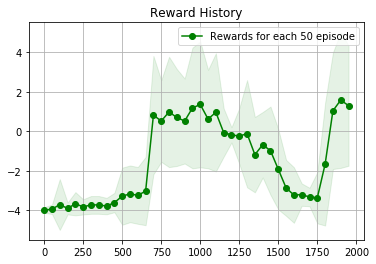

In [64]:
qagent = QLearningAgent()
env = Environment(grid, init_row=1,init_colmn=0)
qagent.learn(env, episode_count=2000)
#show_q_value(agent.Q)
qagent.show_reward_log()

In [65]:
#qagent.Q

In [66]:
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        ob = state.row*env.column_length + state.column + state.agv_stock*env.row_length*env.column_length
        action = np.argmax(qagent.Q[ob])
        next_state, reward, done = env.step(env.actions[action])
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, env.actions[action], reward)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets 11.0 reward.
Episode 1: Agent gets 11.0 reward.
Episode 2: Agent gets 11.0 reward.
Episode 3: Agent gets 11.0 reward.
Episode 4: Agent gets 11.0 reward.
Episode 5: Agent gets 11.0 reward.
Episode 6: Agent gets 11.0 reward.
Episode 7: Agent gets 11.0 reward.
Episode 8: Agent gets 11.0 reward.
Episode 9: Agent gets 11.0 reward.


In [67]:
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = np.argmax(qagent.Q[state])
        next_state, reward, done = env.step(env.actions[action])
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, env.actions[action], reward)
        #print(env.observation)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets -168.0 reward.
Episode 1: Agent gets -168.0 reward.
Episode 2: Agent gets -168.0 reward.
Episode 3: Agent gets -168.0 reward.
Episode 4: Agent gets -168.0 reward.
Episode 5: Agent gets -168.0 reward.
Episode 6: Agent gets -168.0 reward.
Episode 7: Agent gets -168.0 reward.
Episode 8: Agent gets -168.0 reward.
Episode 9: Agent gets -168.0 reward.


# MoteCarloAgent

In [110]:
class MonteCarloAgent(ELAgent):

    def __init__(self, epsilon=0.1):
        super().__init__(epsilon)

    def learn(self, env, episode_count=1000, gamma=0.98,
              render=False, report_interval=50):
        self.init_log()
        actions = list(range(env.actions_length))
        self.Q = defaultdict(lambda: [0] * len(actions))
        N = defaultdict(lambda: [0] * len(actions))

        for e in range(episode_count):
            s = env.reset()
            done = False
            # Play until the end of episode.
            experience = []
            while not done:

                a = self.policy(s, actions)
                n_state, reward, done = env.step(env.actions[a])
                
                experience.append({"state": s, "action": a, "reward": reward})
                s = n_state
            else:
                self.log(reward)

            # Evaluate each state, action.
            for i, x in enumerate(experience):
                s, a = x["state"], x["action"]

                # Calculate discounted future reward of s.
                G, t = 0, 0
                for j in range(i, len(experience)):
                    G += math.pow(gamma, t) * experience[j]["reward"]
                    t += 1

                N[s][a] += 1  # count of s, a pair
                alpha = 1 / N[s][a]
                self.Q[s][a] += alpha * (G - self.Q[s][a])

            if e != 0 and e % report_interval == 0:
                self.show_reward_log(episode=e)

At Episode 50 average reward is -4.0 (+/-0.0).
At Episode 100 average reward is -4.0 (+/-0.0).
At Episode 150 average reward is -4.0 (+/-0.0).
At Episode 200 average reward is -4.0 (+/-0.0).
At Episode 250 average reward is -3.82 (+/-1.26).
At Episode 300 average reward is -4.0 (+/-0.0).
At Episode 350 average reward is -3.98 (+/-0.14).
At Episode 400 average reward is -4.0 (+/-0.0).
At Episode 450 average reward is -4.0 (+/-0.0).
At Episode 500 average reward is -4.0 (+/-0.0).
At Episode 550 average reward is -4.0 (+/-0.0).
At Episode 600 average reward is -3.98 (+/-0.14).
At Episode 650 average reward is -4.0 (+/-0.0).
At Episode 700 average reward is -3.98 (+/-0.14).
At Episode 750 average reward is -3.64 (+/-0.819).
At Episode 800 average reward is -1.92 (+/-1.534).
At Episode 850 average reward is -1.96 (+/-1.076).
At Episode 900 average reward is -1.28 (+/-1.588).
At Episode 950 average reward is -1.38 (+/-1.611).
At Episode 1000 average reward is -1.54 (+/-0.899).
At Episode 105

At Episode 8100 average reward is -0.5 (+/-1.432).
At Episode 8150 average reward is -0.48 (+/-1.432).
At Episode 8200 average reward is -0.72 (+/-0.449).
At Episode 8250 average reward is -0.46 (+/-1.431).
At Episode 8300 average reward is -0.54 (+/-1.431).
At Episode 8350 average reward is -0.42 (+/-1.43).
At Episode 8400 average reward is -0.42 (+/-1.43).
At Episode 8450 average reward is -0.56 (+/-1.444).
At Episode 8500 average reward is -0.72 (+/-0.449).
At Episode 8550 average reward is -0.5 (+/-1.432).
At Episode 8600 average reward is -0.34 (+/-1.966).
At Episode 8650 average reward is -0.7 (+/-0.458).
At Episode 8700 average reward is -0.74 (+/-0.482).
At Episode 8750 average reward is -0.68 (+/-0.508).
At Episode 8800 average reward is -0.74 (+/-0.439).
At Episode 8850 average reward is -0.62 (+/-1.31).
At Episode 8900 average reward is -0.66 (+/-0.514).
At Episode 8950 average reward is -0.68 (+/-0.466).
At Episode 9000 average reward is -0.7 (+/-0.458).
At Episode 9050 ave

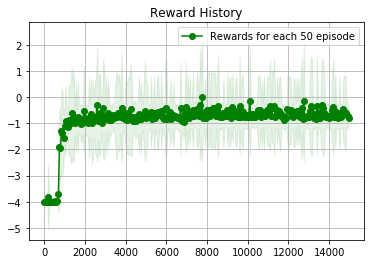

In [122]:
mqagent = MonteCarloAgent(epsilon=0.09)
env = Environment(grid, init_row=1,init_colmn=0)
env.reset()
mqagent.learn(env, episode_count=15000)
#show_q_value(agent.Q)
mqagent.show_reward_log()

In [123]:
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = np.argmax(mqagent.Q[state])
        next_state, reward, done = env.step(env.actions[action])
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, env.actions[action], reward)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets 32.0 reward.
Episode 1: Agent gets 32.0 reward.
Episode 2: Agent gets 32.0 reward.
Episode 3: Agent gets 32.0 reward.
Episode 4: Agent gets 32.0 reward.
Episode 5: Agent gets 32.0 reward.
Episode 6: Agent gets 32.0 reward.
Episode 7: Agent gets 32.0 reward.
Episode 8: Agent gets 32.0 reward.
Episode 9: Agent gets 32.0 reward.


In [124]:
mqagent.Q

defaultdict(<function __main__.MonteCarloAgent.learn.<locals>.<lambda>()>,
            {<State: [1, 0, 1]>: [-9.372796502615277,
              -8.73513766168313,
              -7.775607133175966,
              -2.4867347292846187],
             <State: [2, 0, 1]>: [-13.553781443231973,
              -33.01394457239775,
              -63.02165891414505,
              -56.38908955638416],
             <State: [1, 1, 1]>: [-6.423844778566133,
              -15.72264503638892,
              -6.584803999571271,
              -2.1777814252815513],
             <State: [2, 1, 1]>: [-54.16929046316746,
              -64.29196948783425,
              -61.55267213233335,
              -8.090200684233011],
             <State: [0, 1, 1]>: [-41.50350621125249,
              -10.26258558004463,
              -8.319321776814983,
              -9.618310549620587],
             <State: [0, 0, 1]>: [-33.192867105510054,
              -8.5824091705472,
              -11.994910632080247,
              -2

# A*Agent test

In [74]:
import networkx as nx
import numpy as np

class Astar_Agent():
    
    def __init__(self, grid):
        
        self.grid = grid
        self.start, self.goal = self.grid_to_s_g(self.grid)
        self.g_row, self.g_column = np.shape(self.grid)
        self.path = self.astar_path()
        self.step = 0
        self.rev_step = len(self.path)
    
    def grid_to_s_g(self, grid):
        for i, j in enumerate(grid):
            for l, m in enumerate(j):
                if m == 2:
                    self.start = [i, l]
                elif m == 1:
                    self.goal = [i, l]
        return self.start, self.goal
    
    def dist(self, a, b):
        x1 = np.array(a, dtype=np.float32)
        x2 = np.array(b, dtype=np.float32)
        return np.linalg.norm(x1-x2, ord=1)    
        
    def astar_path(self):
        
        # dim[x_axis, y_axis], x_axis = g_column
        G = nx.grid_graph(dim=[self.g_column, self.g_row])
    
        for _a, _b in enumerate(self.grid):
            for _c, _d in enumerate(_b):
                # remove obstacle node frome nodes
                if _d == 9:
                    G.remove_node((_a, _c))
 
        path = nx.astar_path(G, tuple(self.start), tuple(self.goal), heuristic=self.dist)
        self.path = [list(e) for e in path]
        return self.path

    def action(self):
        a_star_path = np.array(self.path)
        
        if((a_star_path[self.rev_step-1] == self.start)).all():
            self.step = 0
            self.rev_step = len(self.path)
           
        if self.step < len(self.path)-1:
            self.step += 1
        
            if ((a_star_path[self.step-1] + [-1, 0]) == a_star_path[self.step]).all():
                return 0
            elif ((a_star_path[self.step-1] + [1, 0]) == a_star_path[self.step]).all():
                return 1
            elif ((a_star_path[self.step-1] + [0, -1]) == a_star_path[self.step]).all():
                return 2
            elif ((a_star_path[self.step-1] + [0, 1]) == a_star_path[self.step]).all():
                return 3
        
        if self.step >= len(self.path)-1:
            self.step += 1
            self.rev_step -= 1
            if ((a_star_path[self.rev_step] + [-1, 0]) == a_star_path[self.rev_step-1]).all():
                return 0
            elif ((a_star_path[self.rev_step] + [1, 0]) == a_star_path[self.rev_step-1]).all():
                return 1
            elif ((a_star_path[self.rev_step] + [0, -1]) == a_star_path[self.rev_step-1]).all():
                return 2
            elif ((a_star_path[self.rev_step] + [0, 1]) == a_star_path[self.rev_step-1]).all():
                return 3

In [76]:
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

env = Environment(grid, init_row=1,init_colmn=0)
agent = Agent(env)

# Try 10 game.
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    astar_agent = Astar_Agent(grid)
    total_reward = 0
    done = False
    while not done:

        action = astar_agent.action()
        next_state, reward, done = env.step(env.actions[action])
        
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, action, reward)
        #print(state, action, reward)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets -16.0 reward.
Episode 1: Agent gets -16.0 reward.
Episode 2: Agent gets -16.0 reward.
Episode 3: Agent gets -16.0 reward.
Episode 4: Agent gets -16.0 reward.
Episode 5: Agent gets -16.0 reward.
Episode 6: Agent gets -16.0 reward.
Episode 7: Agent gets -16.0 reward.
Episode 8: Agent gets -16.0 reward.
Episode 9: Agent gets -16.0 reward.
